# Segmentation of Image and Color Extraction using KMeans Clustering.
Name : Utkarsh Pandey

Section :  B

Roll no. : 71

University Roll no. : 2019204



Importing Essential libraries

In [32]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Reading the image

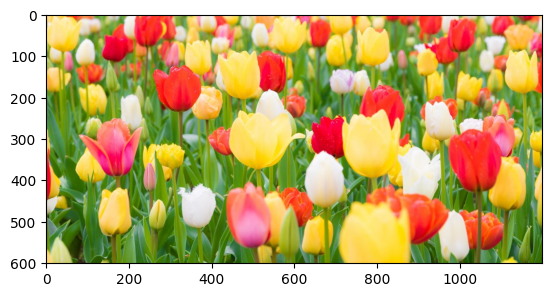

(721200, 3)


In [33]:
im = cv2.imread("flower.jpg")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(im)
plt.show()
reshaped_im = im.reshape((-1, 3))
print(reshaped_im.shape)

Setting number of centroids

In [34]:
k = 5
kmeans = KMeans(k)

Fitting into model

In [35]:
kmeans.fit(reshaped_im)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

Dominant colors

In [36]:
dominant_colors = kmeans.cluster_centers_.astype('uint8')
dominant_colors

array([[ 79, 120,  22],
       [242, 197,  74],
       [240,  59,  54],
       [238, 217, 185],
       [126, 156,  71]], dtype=uint8)

In [37]:
np.zeros_like(reshaped_im).shape

(721200, 3)

In [38]:
kmeans.labels_

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

(601, 1200, 3)


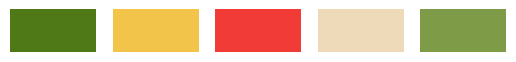

In [39]:
plt.figure()
for i,color in enumerate(dominant_colors):
    palette = np.zeros_like(im, dtype='uint8')
    palette[:,:,:] = color
    plt.subplot(1,k,i+1)
    plt.axis("off")
    plt.imshow(palette)
print(im.shape)

Segmenting Image

In [40]:
new_img = np.zeros((im.shape[0]*im.shape[1],3),dtype='uint8')
print(new_img.shape)

(721200, 3)


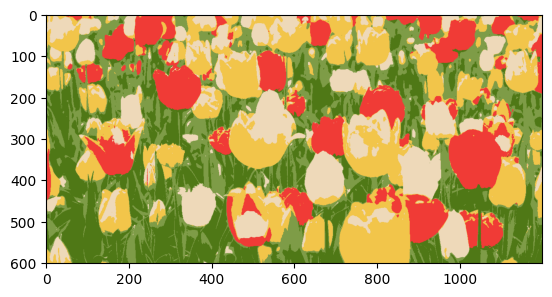

In [41]:
for ix in range(new_img.shape[0]):
    new_img[ix] = dominant_colors[kmeans.labels_[ix]]

new_img = new_img.reshape((im.shape))
plt.imshow(new_img)
plt.show()